In [11]:
import numpy as np
import matplotlib.pyplot as plt
import fitsio 
%matplotlib inline

In [3]:
fdir = '/home/rodrigo/Documentos/maestria/ultimo_año/datos_boss_dr9/BOSSLyaDR9_cat.fits'

In [4]:
DM = fitsio.FITS(fdir)
DM


  file: /home/rodrigo/Documentos/maestria/ultimo_año/datos_boss_dr9/BOSSLyaDR9_cat.fits
  mode: READONLY
  extnum hdutype         hduname[v]
  0      IMAGE_HDU       
  1      BINARY_TBL      BOSSLyaDR9_cat

In [5]:
fm = fitsio.read(fdir,'BOSSLyaDR9_cat')
fm.dtype.descr

[('SDSS_NAME', '|S18'),
 ('RA', '>f4'),
 ('DEC', '>f4'),
 ('THING_ID', '>i4'),
 ('PLATE', '>i4'),
 ('MJD', '>i4'),
 ('FIBERID', '>i4'),
 ('Z_VI', '>f4'),
 ('Z_PIPE', '>f4'),
 ('SNR', '>f4'),
 ('SNR_LYAF', '>f4'),
 ('CHISQ_CONT', '>f4'),
 ('CONT_FLAG', '>i4'),
 ('CONT_TEMPLATE', '|S8'),
 ('Z_DLA', '>f4'),
 ('LOG_NHI', '>f4')]

In [11]:
print('minimum redshift = {} \nmaximum redshift = {} \nshape = {}'.format(np.min(fm['Z_VI']),np.max(fm['Z_VI']),fm['Z_VI'].shape))

minimum redshift = 2.1510000228881836 
maximum redshift = 5.422999858856201 
shape = (54468,)


In [12]:
for i in range(len(fm['FIBERID'])):
    if fm['PLATE'][i] == 3813:
        if fm['MJD'][i] == 55532:
            if fm['FIBERID'][i] == 10:
                print(i)
                break

15361


In [13]:
fm['FIBERID'][354]

10

In [14]:
fm['Z_VI'][15361]

2.319

In [12]:
speclya = fdir.replace('BOSSLyaDR9_cat.fits', 'BOSSLyaDR9_spectra/3813/speclya-3813-55532-0010.fits')
sp = fitsio.read(speclya)
sp.dtype.descr

[('FLUX', '>f4'),
 ('LOGLAM', '>f4'),
 ('IVAR', '>f4'),
 ('AND_MASK', '>i4'),
 ('OR_MASK', '>i4'),
 ('WDISP', '>f4'),
 ('SKY', '>f4'),
 ('MODEL', '>f4'),
 ('MASK_COMB', '>i4'),
 ('DLA_CORR', '>f4'),
 ('NOISE_CORR', '>f4'),
 ('CONT', '>f4')]

In [17]:
wave = []
for i in range(len(sp['FLUX'])):
    wave.append(10**(sp['LOGLAM'][i]))

Text(0,0.5,'Flux    ($10^{-17} ergs/s/cm^{2}/\\AA$)')

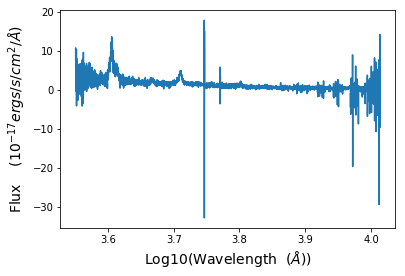

In [27]:
plt.plot(sp['LOGLAM'],sp['FLUX'])
plt.xlabel('Log10(Wavelength  ($\AA$))',fontsize = 14)
plt.ylabel('Flux    ($10^{-17} ergs/s/cm^{2}/\AA$)',fontsize = 14)

Text(0,0.5,'Flux    ($10^{-17} ergs/s/cm^{2}/\\AA$)')

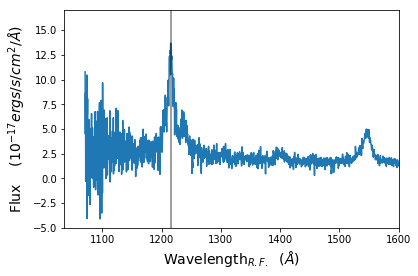

In [28]:
plt.plot(wave/(1+fm['Z_VI'][15361]),sp['FLUX'])
plt.axvline(1216, color = 'k',alpha=0.5)
plt.xlim(1035,1600)
plt.ylim(-5,17)
plt.xlabel('Wavelength$_{R.F.}$  ($\AA$)',fontsize = 14)
plt.ylabel('Flux    ($10^{-17} ergs/s/cm^{2}/\AA$)',fontsize = 14)

In [20]:
sp['CONT']

array([3.6404119, 3.6349828, 3.6293714, ..., 0.       , 0.       ,
       0.       ], dtype=float32)

Text(0,0.5,'Flux    ($10^{-17} ergs/s/cm^{2}/\\AA$)')

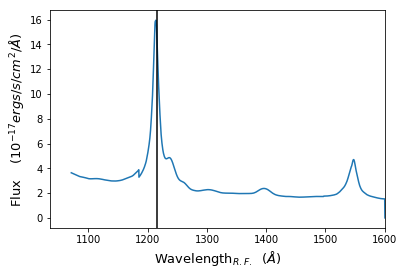

In [25]:
plt.plot(wave/(1+fm['Z_VI'][15361]),sp['CONT'])
plt.axvline(1216, color = 'k')
plt.xlim(1035,1600)
#plt.ylim(-5,17)
plt.xlabel('Wavelength$_{R.F.}$  ($\AA$)',fontsize = 13)
plt.ylabel('Flux    ($10^{-17} ergs/s/cm^{2}/\AA$)',fontsize = 13)

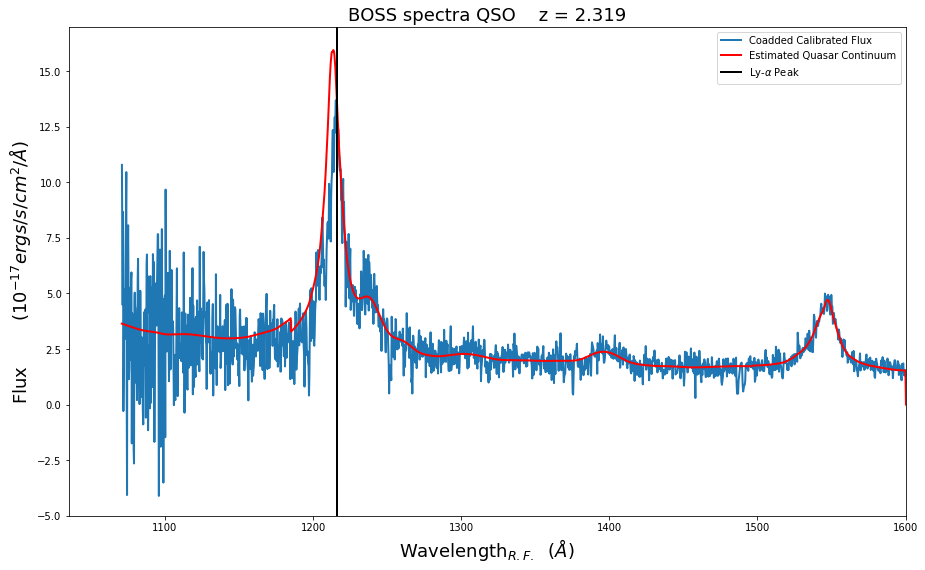

In [22]:
plt.figure(figsize=(15,9))
plt.title('BOSS spectra QSO    z = 2.319',fontsize = 18)
plt.plot(wave/(1+fm['Z_VI'][15361]),sp['FLUX'],label='Coadded Calibrated Flux',linewidth=2.0)
plt.plot(wave/(1+fm['Z_VI'][15361]),sp['CONT'],label='Estimated Quasar Continuum', color='r',linewidth=2.0)
plt.axvline(1216, color = 'k',label=('Ly-$\\alpha$ Peak'),linewidth=2.0)
plt.xlim(1035,1600)
plt.ylim(-5,17)
plt.xlabel('Wavelength$_{R.F.}$  ($\AA$)',fontsize = 18)
plt.ylabel('Flux        ($10^{-17} ergs/s/cm^{2}/\AA$)',fontsize = 18)
plt.legend()
#plt.savefig('1boss.png')